# Simple Linear Reagression

## Read the datasets

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
a = pd.read_csv('50_Startups.csv')
a.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
a.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
a.duplicated().sum()

0

## Seperate x and Y 
## PROFIT ~ RND

## PROFIT_pred = B0 + B1XRND

<Axes: xlabel='RND', ylabel='PROFIT'>

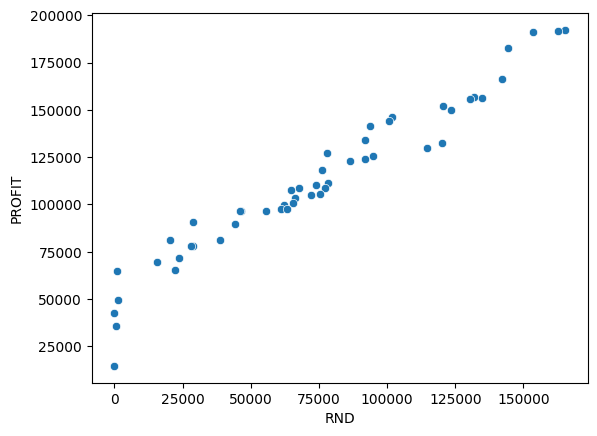

In [8]:
import seaborn as sns
sns.scatterplot(data=a, x='RND', y='PROFIT')

In [12]:
x= a[['RND']]
y= a[['PROFIT']]

In [13]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [14]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [16]:
model.coef_

array([[0.85429137]])

In [17]:
model.intercept_

array([49032.89914125])

## PROFIT_pred = 49032.89 +0.85429137*RND

<Axes: xlabel='RND', ylabel='PROFIT'>

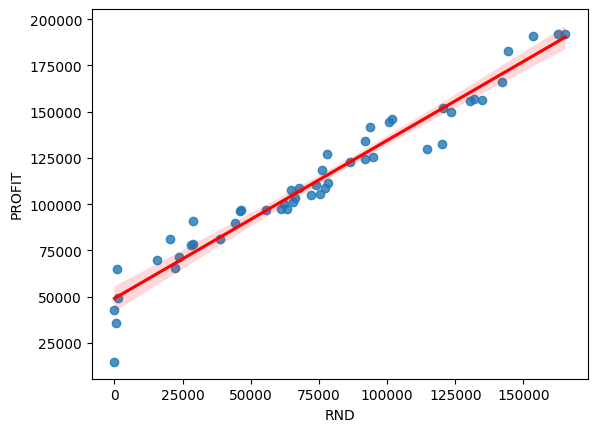

In [18]:
sns.regplot(data=a, x='RND',y='PROFIT',line_kws={'color':'red'})

In [19]:
rnd = [[80000]]
profit_predict= model.predict(rnd)
profit_predict

array([[117376.20881636]])

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [21]:
ypred = model.predict(x)

In [23]:
mse = mean_squared_error(y,ypred)
mse

85120931.32706906

In [24]:
rmse = mse**(1/2)

In [25]:
rmse

9226.100548285232

In [27]:
mae = mean_absolute_error(y,ypred)
mae

6910.98435457961

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y,ypred)
mape

0.11070141081984847

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y,ypred)
r2

0.9465353160804393

## Muiltiple Linear Regression

In [30]:
b = pd.read_csv('50_Startups.csv')
b.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [32]:
b.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [34]:
b.duplicated().sum()

0

## Seperate X AND Y

In [36]:
X = b[['RND','ADMIN','MKT']]
Y = b[['PROFIT']]

In [37]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [38]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [40]:
## B0 value
model.intercept_


array([50122.19298987])

In [41]:
## B1 value
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [43]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

## PROFIT_predict = 50122.1929 + 0.80571505*RND - 0.02681597*ADMIN + 0.02722806*MKT

In [44]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef


RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

In [45]:
X_new = [[100000,50000,60000]]
model.predict(X_new)


array([[130986.58344975]])

<Axes: title={'center': 'prediction'}>

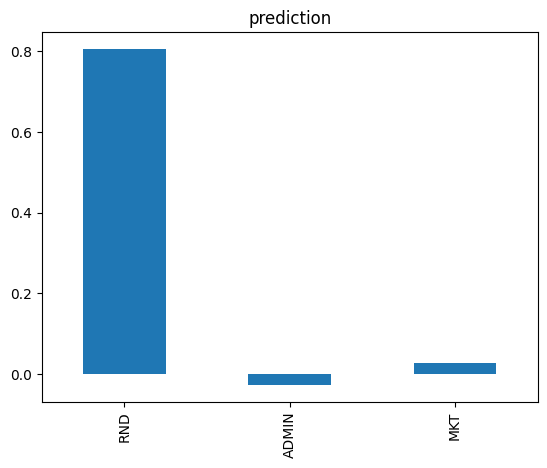

In [46]:
coef.plot(kind='bar',title='prediction')

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
Ypred= model.predict(X)

In [49]:
mse = mean_squared_error(Y,Ypred)

In [50]:
mse

78417126.01913083

In [51]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [52]:
mae = mean_absolute_error(Y,Ypred)
mae

6471.4503961048085

In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,Ypred)
mape

0.10601209160494125

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Ypred)

In [55]:
r2

0.9507459940683246

In [56]:
X_new = [[100000,50000,30000]]
model.predict(X_new)

array([[130169.74150573]])

In [57]:
X_new = [[100000,30000,30000]]
model.predict(X_new)

array([[130706.06087362]])

In [59]:
X_new = [[150000,50000,30000]]
model.predict(X_new)

array([[170455.49400151]])